<h1 align=center> Proceso de ETL <sub align=center> (ETL PROCESS)</sub></h1>

<h3 align=left> Instalacion de librerias<sub>/Library installation</sub> </h3>

In [ ]:
pip install -r requirements.txt

<h3 align=left> Importacion de librerias<sub>/Library Importing</sub> </h3>

In [1]:
import pandas as pd
import seaborn as sns
import json

<h2 align=Center> Extraccion de datos<sub>/Data extraction</sub></h2>

<h3 align=left> Rutas /<sub> Paths</sub> </h3>

In [6]:
# Ubicaciones de los archivos Json\\ Json files paths
raw_games = 'output_steam_games.json'

<h3 align=left> Funciones<sub>/Functions</sub></h3>

In [2]:
def Open_extraction(raw_data):
  """
  Esta función lee el archivo JSON y entrega una lista de diccionarios.
  This function reads JSON data from a file and converts it into a list of dictionaries.
  """
  with open(raw_data, 'r', encoding='utf-8') as Json_file:
          new_list = [json.loads(line) for line in Json_file]
  return new_list

In [3]:
def Unnesting_data(raw_df,data_column):
    """
    Esta función transforma una columna con datos anidados en un conjunto de columnas independientes y las une en un solo Dataframe
    This function transforms a column with nested data into a set of independent columns and joins them into a single Dataframe.
    """
    data_columns = raw_df.explode([data_column])
    unnested_data1 =pd.json_normalize(data_columns[data_column]).set_index(data_columns[data_column].index)
    processed_data = pd.concat([data_columns, unnested_data1], axis=1).reset_index().drop(['index',data_column], axis = 1)
    return processed_data


In [8]:
preprocess_games_data = pd.DataFrame(Open_extraction(raw_games))


<h2 align=Center> Transformacion de datos<sub>/Data transform</sub></h2>

<h3>Datos nulos<sub>/null data</sub></h3>

In [9]:
# Datos nulos en el dataframe / Null data in the dataframe
preprocess_games_data.isnull().any()

publisher       True
genres          True
app_name        True
title           True
url             True
release_date    True
tags            True
reviews_url     True
specs           True
price           True
early_access    True
id              True
developer       True
dtype: bool

<h4>Comparacion de datos nulos por columna</h4>

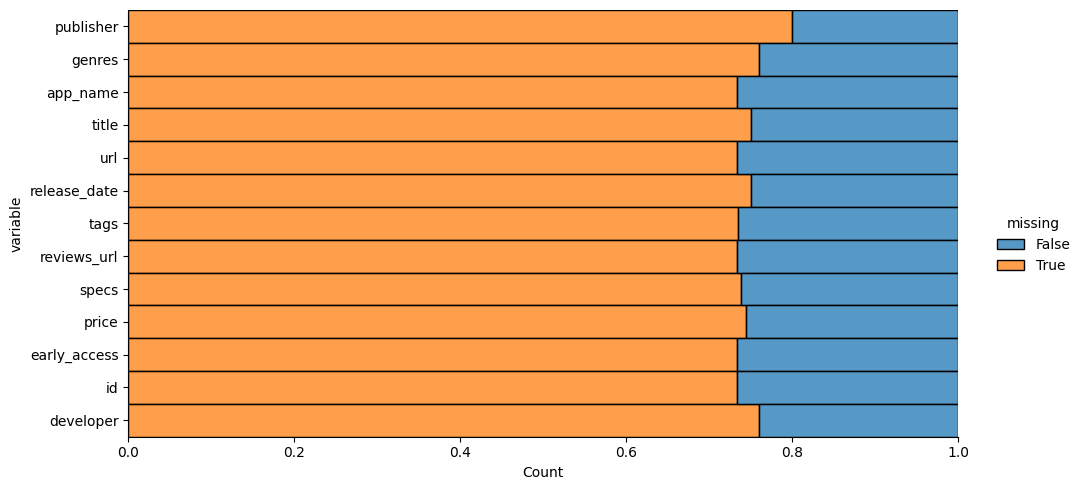

In [10]:
# proporción de valores nulos / proportion of missing values
(
    preprocess_games_data
    .isnull()
    .melt(value_name='missing')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='missing',
                multiple='fill',
                aspect=2
            )
        )
    )
)

<Axes: >

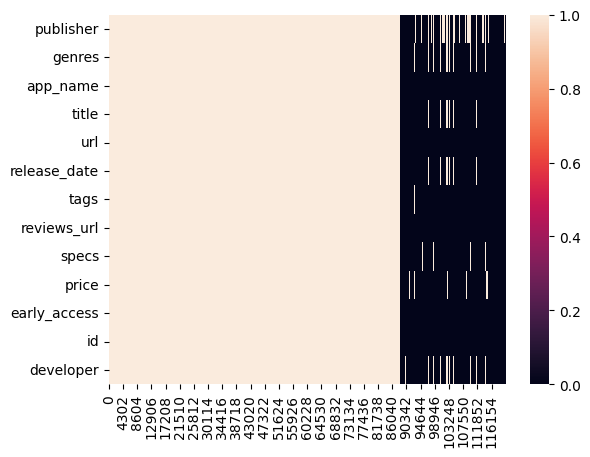

In [11]:
# Visualizacion de los valores nulos / visualization of missing values
(
    preprocess_games_data
    .isnull()
    .transpose()
    .pipe(
        lambda df: sns.heatmap(data=df)
    )
)

<h4>Elimminacion de nulos <sub>/ missing value handling </sub></h4>

In [12]:
# Eliminacion de datos nulos que carecen de relaciones entre columnas / Deletion of missing data that lack relationships between columns
Fullnan_drop_games = pd.concat([preprocess_games_data.iloc[0:88310].dropna(), preprocess_games_data.iloc[88311:]], axis=0).reset_index().drop('index', axis = 1)
Fullnan_drop_games

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL
1,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com
2,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域
3,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN
4,Trickjump Games Ltd,"[Action, Adventure, Simulation]",Battle Royale Trainer,Battle Royale Trainer,http://store.steampowered.com/app/772540/Battl...,2018-01-04,"[Action, Adventure, Simulation, FPS, Shooter, ...",http://steamcommunity.com/app/772540/reviews/?...,"[Single-player, Steam Achievements]",3.99,False,772540,Trickjump Games Ltd
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32129,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,False,773640,"Nikita ""Ghost_RUS"""
32130,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,False,733530,Sacada
32131,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,Laush Dmitriy Sergeevich
32132,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,False,658870,"xropi,stev3ns"


<h3>Preparacion de columnas<sub>/ column preparation </sub></h3>

In [ ]:
# Rellenado de elementos faltantes entre columnas / Imputation of missing values between columns
Fullnan_drop_games['title'].fillna(Fullnan_drop_games['app_name'], inplace=True)
Fullnan_drop_games['developer'].fillna(Fullnan_drop_games['publisher'], inplace=True)


In [14]:
# Eliminacion de columnas no necesarias para el analisis / Eliminacion de columnas no necesarias para el analisis
preprocess_games = Fullnan_drop_games.drop(['app_name', 'publisher','url','tags','reviews_url','early_access','specs'], axis = 1)
preprocess_games

,genres,title,release_date,price,id,developer
0,"[Free to Play, Indie, RPG, Strategy]",Ironbound,2018-01-04,Free To Play,643980,Secret Level SRL
1,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,2017-07-24,Free to Play,670290,Poolians.com
2,"[Action, Adventure, Casual]",弹炸人2222,2017-12-07,0.99,767400,彼岸领域
3,NaN,Log Challenge,NaN,2.99,773570,NaN
4,"[Action, Adventure, Simulation]",Battle Royale Trainer,2018-01-04,3.99,772540,Trickjump Games Ltd
...,...,...,...,...,...,...
32129,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,2018-01-04,1.99,773640,"Nikita ""Ghost_RUS"""
32130,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,2018-01-04,4.99,733530,Sacada
32131,"[Indie, Racing, Simulation]",Russian Roads,2018-01-04,1.99,610660,Laush Dmitriy Sergeevich
32132,"[Casual, Indie]",EXIT 2 - Directions,2017-09-02,4.99,658870,"xropi,stev3ns"


In [15]:
# Desanidacion de columna 'genres' / Unnestig 'genres' column
df_expanded = preprocess_games["genres"].apply(pd.Series)
df_expanded2= pd.concat([preprocess_games, df_expanded], axis=1).reset_index().drop(['index',"genres"],axis = 1)

In [16]:
genres = df_expanded.drop([5,6,7,8,9,10], axis = 1)
genres = pd.concat([preprocess_games, df_expanded], axis=1)

In [18]:
df_expanded2 = df_expanded2.rename(columns= {0:"genre"})
df_expanded2 = df_expanded2.drop([1,2,3,4,5,6,7,8,9,10],axis = 1)
df_expanded2

,title,release_date,price,id,developer,genre
0,Ironbound,2018-01-04,Free To Play,643980,Secret Level SRL,Free to Play
1,Real Pool 3D - Poolians,2017-07-24,Free to Play,670290,Poolians.com,Casual
2,弹炸人2222,2017-12-07,0.99,767400,彼岸领域,Action
3,Log Challenge,NaN,2.99,773570,NaN,NaN
4,Battle Royale Trainer,2018-01-04,3.99,772540,Trickjump Games Ltd,Action
...,...,...,...,...,...,...
32129,Colony On Mars,2018-01-04,1.99,773640,"Nikita ""Ghost_RUS""",Casual
32130,LOGistICAL: South Africa,2018-01-04,4.99,733530,Sacada,Casual
32131,Russian Roads,2018-01-04,1.99,610660,Laush Dmitriy Sergeevich,Indie
32132,EXIT 2 - Directions,2017-09-02,4.99,658870,"xropi,stev3ns",Casual


In [19]:
# Revision de columna price / review of the price column
df_expanded2['price'].unique()

array(['Free To Play', 'Free to Play', 0.99, 2.99, 3.99, 9.99, 18.99,
       29.99, nan, 'Free', 10.99, 1.59, 14.99, 1.99, 59.99, 4.99, 8.99,
       6.99, 7.99, 39.99, 19.99, 7.49, 12.99, 5.99, 2.49, 15.99, 1.25,
       24.99, 17.99, 61.99, 3.49, 11.99, 13.99, 'Free Demo',
       'Play for Free!', 34.99, 74.76, 1.49, 32.99, 99.99, 14.95, 69.99,
       16.99, 79.99, 49.99, 5.0, 44.99, 13.98, 29.96, 119.99, 109.99,
       149.99, 771.71, 'Install Now', 21.99, 89.99,
       'Play WARMACHINE: Tactics Demo', 0.98, 139.92, 4.29, 64.99,
       'Free Mod', 54.99, 74.99, 'Install Theme', 0.89, 'Third-party',
       0.5, 'Play Now', 299.99, 1.29, 3.0, 15.0, 5.49, 23.99, 49.0, 20.99,
       10.93, 1.39, 'Free HITMAN™ Holiday Pack', 36.99, 4.49, 2.0, 4.0,
       9.0, 234.99, 1.95, 1.5, 199.0, 189.0, 6.66, 27.99, 10.49, 129.99,
       179.0, 26.99, 399.99, 31.99, 399.0, 20.0, 40.0, 3.33, 199.99,
       22.99, 320.0, 38.85, 71.7, 59.95, 995.0, 27.49, 3.39, 6.0, 19.95,
       499.99, 16.06, 4.68, 131

In [20]:
# Correccion de algunos elementos no numericos / Correction of some non-numeric elements
df_expanded2['price'] = df_expanded2['price'].replace({'Free To Play': 0.00, 'Free Demo': 0.00, 'Free to Play': 0.00,'Free': 0.00, 'Free Mod':0.00,'Play Now':0.00,'Free to Try':0.00,'Free to Use':0.00, 'Play for Free!':0.00,'Free HITMAN™ Holiday Pack': 0.00})
preprocess_games = df_expanded2[pd.to_numeric(df_expanded2['price'], errors='coerce').notnull()]
preprocess_games

,title,release_date,price,id,developer,genre
0,Ironbound,2018-01-04,0.0,643980,Secret Level SRL,Free to Play
1,Real Pool 3D - Poolians,2017-07-24,0.0,670290,Poolians.com,Casual
2,弹炸人2222,2017-12-07,0.99,767400,彼岸领域,Action
3,Log Challenge,NaN,2.99,773570,NaN,NaN
4,Battle Royale Trainer,2018-01-04,3.99,772540,Trickjump Games Ltd,Action
...,...,...,...,...,...,...
32129,Colony On Mars,2018-01-04,1.99,773640,"Nikita ""Ghost_RUS""",Casual
32130,LOGistICAL: South Africa,2018-01-04,4.99,733530,Sacada,Casual
32131,Russian Roads,2018-01-04,1.99,610660,Laush Dmitriy Sergeevich,Indie
32132,EXIT 2 - Directions,2017-09-02,4.99,658870,"xropi,stev3ns",Casual


In [21]:
# Correccion de nombre de la columna 'id' / Column 'id' name correction
processed_games = preprocess_games.rename(columns= {"id":"item_id"})
processed_games

,title,release_date,price,item_id,developer,genre
0,Ironbound,2018-01-04,0.0,643980,Secret Level SRL,Free to Play
1,Real Pool 3D - Poolians,2017-07-24,0.0,670290,Poolians.com,Casual
2,弹炸人2222,2017-12-07,0.99,767400,彼岸领域,Action
3,Log Challenge,NaN,2.99,773570,NaN,NaN
4,Battle Royale Trainer,2018-01-04,3.99,772540,Trickjump Games Ltd,Action
...,...,...,...,...,...,...
32129,Colony On Mars,2018-01-04,1.99,773640,"Nikita ""Ghost_RUS""",Casual
32130,LOGistICAL: South Africa,2018-01-04,4.99,733530,Sacada,Casual
32131,Russian Roads,2018-01-04,1.99,610660,Laush Dmitriy Sergeevich,Indie
32132,EXIT 2 - Directions,2017-09-02,4.99,658870,"xropi,stev3ns",Casual


In [22]:
# Creacion de la columna release_year con la data de release_date / Extract 'release_year' from 'release_date' column
processed_games['release_year'] = processed_games['release_date'].str.extract(r'(\d{4})')
processed_games = processed_games.drop('release_date', axis = 1)
processed_games

,title,price,item_id,developer,genre,release_year
0,Ironbound,0.0,643980,Secret Level SRL,Free to Play,2018
1,Real Pool 3D - Poolians,0.0,670290,Poolians.com,Casual,2017
2,弹炸人2222,0.99,767400,彼岸领域,Action,2017
3,Log Challenge,2.99,773570,NaN,NaN,NaN
4,Battle Royale Trainer,3.99,772540,Trickjump Games Ltd,Action,2018
...,...,...,...,...,...,...
32129,Colony On Mars,1.99,773640,"Nikita ""Ghost_RUS""",Casual,2018
32130,LOGistICAL: South Africa,4.99,733530,Sacada,Casual,2018
32131,Russian Roads,1.99,610660,Laush Dmitriy Sergeevich,Indie,2018
32132,EXIT 2 - Directions,4.99,658870,"xropi,stev3ns",Casual,2017


In [23]:
#Eliminacion de datos nulos restantes / Removing remaining null data
processed_games  = processed_games.dropna()
processed_games.isna().any()

title           False
price           False
item_id         False
developer       False
genre           False
release_year    False
dtype: bool

<h2 align=Center> Carga de datos<sub>/Data load</sub></h2>

<h4>Convercion de archivos Json a parquet<sub>/Converting JSON file to Parquet format<sub></h4>

In [ ]:
processed_games.to_parquet('games.parquet')